# Lecture 8: Digital Image Processing

#### Point Pixel Operations


### Objectives

- To understand the concept of point pixel operations


---


### Importing the required libraries


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

### Reading the Image

Reading the image using the imread() function of the cv2 library and storing it in the variable image. Convert the image to grayscale using the cvtColor() function of the cv2 library.


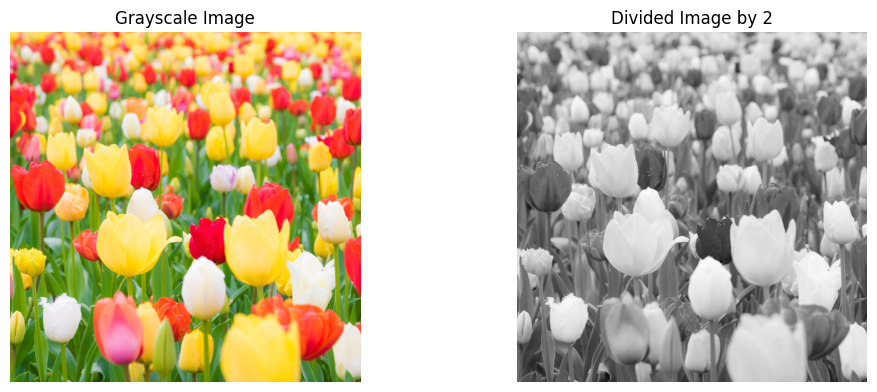

In [2]:
image = cv2.imread("image1.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 10))

# Plot the color image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
plt.title("Grayscale Image")
plt.axis("off")

# Plot the gray image
plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap="gray")
plt.title("Divided Image by 2")
plt.axis("off")

plt.show()

---


## Conclusion

In this lab, we have learned how to perform point pixel operations on an image.
